**EDA: Online Purchase Intention**  

⚡ Author: [Afida Sabrina](https://www.linkedin.com/in/afidasabrinas/) ⚡



In [2]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/Data Analyst/dataset

/content/gdrive/MyDrive/Data Analyst/dataset


In [4]:
df = pd.read_csv('online_shoppers_intention.csv',encoding ='latin')

# Data Proffiling

Online Purchase Intention dataset is data about consumers' intention when buying a product. It consists of 12.330 buying sessions throughout the year. Eighteen variables consist of `Revenue ` as the class label, ten numeric variables, and eight categorical variables. These variables are grouped into several groups of variables as follows:

1. **Page and Duration**: `Administrative` (account management), `Administrative_Duration`, `Informational` (Web site, communication and address information of the shopping site), `Informational_Duration`, `ProductRelated` and `ProductRelated_Duration`
2. **Google Analytics Metrics**: `BounceRates`, `ExitRates`, and `PageValues`
3. **Time**: `Weekend` and `Month`.
4. **Other variables**: `SpecialDay`, `OperatingSystem`, `Browser`, `Region`, `TrafficType`, `VisitorType`

The report generates insights into the relationship between variables with revenue. Act as a stepping stone to understand predictors which influence customers to finish their transaction.

#Access and Clean Data

In [ ]:
#General picture of how dataframe looks like
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
#Missing value, data types, and shape of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# Check Target Variable

There are 20% of consumers who decide to make a purchase, while the other 80% is not complete the transactions.

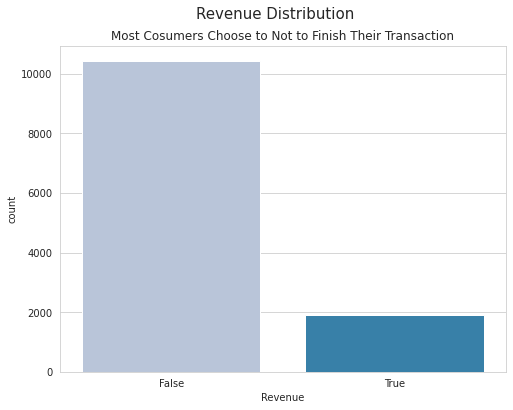

In [ ]:
#Count of revenue
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.countplot(x= 'Revenue', data=df, palette= 'PuBu')

title_string = "Revenue Distribution"
subtitle_string = "Most Cosumers Choose to Not to Finish Their Transaction"

plt.suptitle(title_string, y = 0.97, fontsize = 15)
plt.title(subtitle_string, fontsize = 12)
plt.show()

# Month

The analysis begins by grouping the data by `Month` to facilitate analysis.

In [ ]:
#group data by month
df_by_month = df.groupby(['Month']).sum()
#order dataframe by Revenue
df_by_month.sort_values(by=['Revenue'])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Month,,,,,,,,,,,,,,,,
Feb,100,3104.525000,16,439.000000,2058,8.666670e+04,8.651934,13.643285,163.826743,43.0,353,401,490,510,28,3
June,655,17029.424392,162,5889.823333,10387,3.494527e+05,10.109304,16.773806,976.734639,0.0,614,667,919,1213,47,29
Jul,1047,34073.722728,223,19664.816667,15728,5.260049e+05,10.660237,19.582716,1773.106673,0.0,905,1028,1475,1591,104,66
Aug,1358,46208.585717,235,15377.720000,16566,5.510590e+05,7.885283,16.335648,2571.184257,0.0,897,1030,1407,1521,96,76
Sep,1494,48977.792121,254,16010.101905,14831,5.615179e+05,5.458009,13.583583,3385.457907,0.0,959,1114,1476,1493,96,86
Oct,2042,69140.700580,268,21228.142381,18428,6.132207e+05,6.505344,15.927259,4746.423532,0.0,1129,1223,1753,2348,144,115
Mar,3600,135838.483159,802,58494.868338,37775,1.549024e+06,41.434902,85.051385,7551.113004,0.0,3964,4370,5785,6062,481,192
Dec,3793,135799.069028,885,65745.780954,48347,1.919510e+06,34.797567,71.329893,11801.010926,0.0,3892,4513,5861,7026,366,216
May,6610,233703.101976,1426,91376.868009,89105,3.303088e+06,90.379267,164.329829,18271.814428,714.4,7132,7969,10546,15060,715,365


Based on the data above:
1. The more `Revenue` you get every month, the higher the `Administrative`, `Informational`, and `ProductRelated`. Along with their duration value 🔽
2. The value of `ProductRelated` in September decreased even though `Revenue` increased 🔽
3. The largest increase in `ProductRelated` occurred in May, but the increase was not experienced on other pages 🔽
4. There is an increasing trend in the `Weekend` variable along with the increase in `Revenue` 🔽

# ProductRelated Analysis in May

- May had the highest number of visitors. Meanwhile its number of `SpecialDay` is also the highest. We can **assume** if there is correlation between both of the variable 🔽

- On the other side, Its Revenue obtained is not as much as in November. **Maybe** it caused by higher value of `BounceRates` and `ExitRates`, with lower number of `PageValue` 🔽 

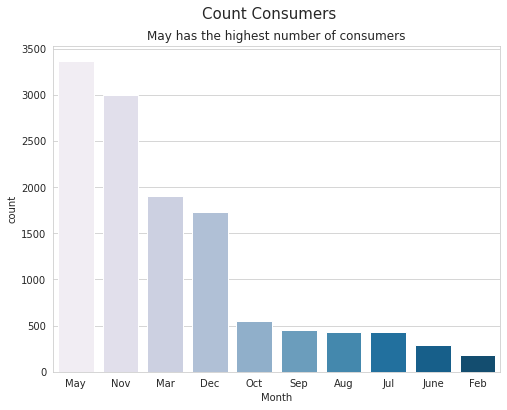

In [ ]:
#count the number of consumers every month
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.countplot(x= 'Month', data=df, palette= 'PuBu',order = df['Month'].value_counts().index)

title_string = "Count Consumers"
subtitle_string = "May has the highest number of consumers"

plt.suptitle(title_string, y = 0.97, fontsize = 15)
plt.title(subtitle_string, fontsize = 12)
plt.show()

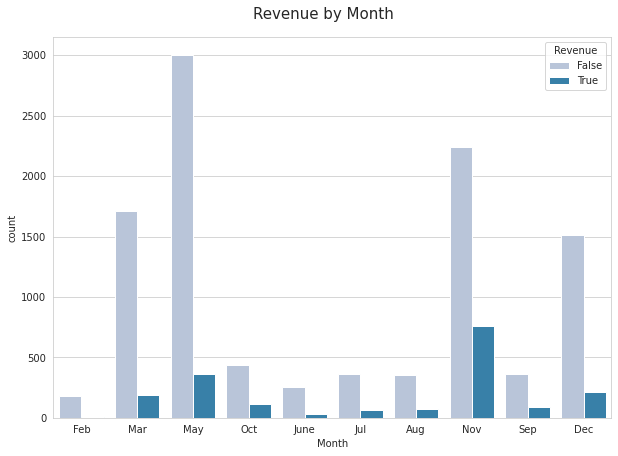

In [ ]:
#count Revenue in Month
plt.figure(figsize=(10,7))
sns.set_style("whitegrid")
sns.countplot(data=df, hue='Revenue', x='Month',palette= 'PuBu')

title_string = "Revenue by Month"

plt.suptitle(title_string, y = 0.94, fontsize = 15)
plt.show()

## Special Day Analysis

↪ The following table confirms that consumers consider the `SpecialDay` in May to be very important and induce intention to purchase from the previous few days. However, if we look at the data as a whole. Most purchases occurred in the 0.0 category.

In [ ]:
#Count SpecialDay in every Month
df.groupby(['Month', 'SpecialDay'])['Revenue'].aggregate('count').unstack()

SpecialDay,0.0,0.2,0.4,0.6,0.8,1.0
Month,,,,,,
Aug,433.0,NaN,NaN,NaN,NaN,NaN
Dec,1727.0,NaN,NaN,NaN,NaN,NaN
Feb,105.0,15.0,21.0,19.0,19.0,5.0
Jul,432.0,NaN,NaN,NaN,NaN,NaN
June,288.0,NaN,NaN,NaN,NaN,NaN
Mar,1907.0,NaN,NaN,NaN,NaN,NaN
May,2192.0,163.0,222.0,332.0,306.0,149.0
Nov,2998.0,NaN,NaN,NaN,NaN,NaN
Oct,549.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#count revenue in all SpecialDay category
pd.crosstab(df['SpecialDay'], df['Revenue'],margins=True)

Revenue,False,True,All
SpecialDay,,,
0.0,9248,1831,11079
0.2,164,14,178
0.4,230,13,243
0.6,322,29,351
0.8,314,11,325
1.0,144,10,154
All,10422,1908,12330


# Weekend

↪ This analysis dispels the assumption previously made if buyers mostly buy on weekends.

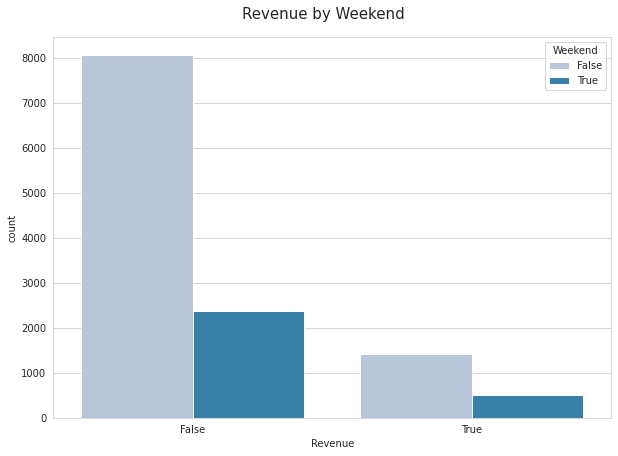

In [ ]:
#count Revenue in Weekend
plt.figure(figsize=(10,7))
sns.set_style("whitegrid")
sns.countplot(data=df, hue='Weekend', x='Revenue',palette= 'PuBu')

title_string = "Revenue by Weekend"

plt.suptitle(title_string, y = 0.94, fontsize = 15)
plt.show()

# Pages Analysis

↪ The plots does not confirm the assumptions made previously if the greater the value of pages, will cause more possibility to completing the transaction.

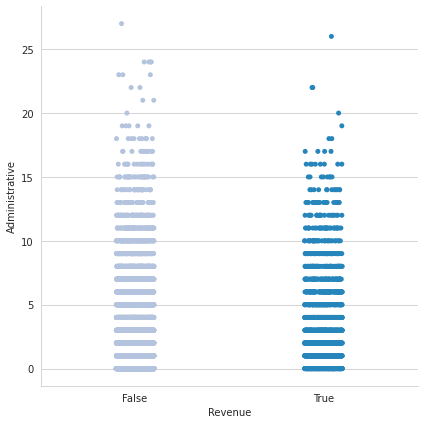

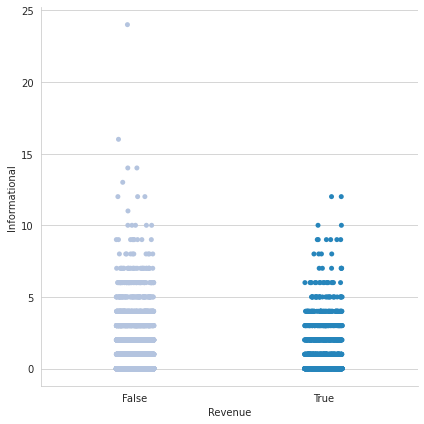

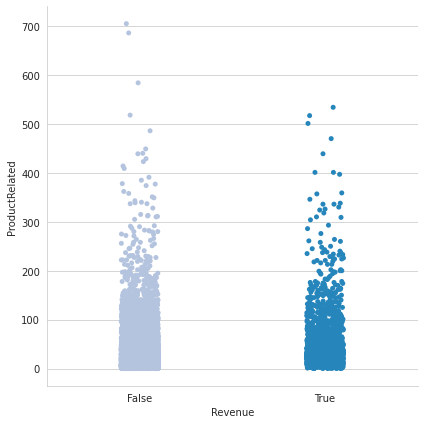

In [ ]:
#distribution of revenue by Administrative

sns.set_style("whitegrid")
sns.catplot(y='Administrative', x='Revenue', data=df,palette= 'PuBu',height=6)
sns.catplot(y='Informational', x='Revenue', data=df,palette= 'PuBu',height=6)
sns.catplot(y='ProductRelated', x='Revenue', data=df,palette= 'PuBu',height=6)


## Zero Value Analysis in Pages

In [ ]:
#Administrative Value in the dataset
df_pages = df[['Administrative','Informational','ProductRelated','Revenue']]
df_pages.sum(axis = 0, skipna = True)

Administrative     28546
Informational       6209
ProductRelated    391249
Revenue             1908
dtype: int64

In [ ]:
#Exclude zero value in Adminstrative
df_administrative = df_pages[df_pages["Administrative"] != 0]
df_administrative.sum(axis = 0, skipna = True)

Administrative     28546
Informational       5324
ProductRelated    288142
Revenue             1394
dtype: int64

In [ ]:
#Filter Administrative value into zero
df_administrative0 = df_pages[df_pages["Administrative"] == 0]
df_administrative0.sum(axis = 0, skipna = True)

Administrative         0
Informational        885
ProductRelated    103107
Revenue              514
dtype: int64

In [ ]:
#Filter Informational ve value into zero
df_Informational0 = df_pages[df_pages["Informational"] == 0]
df_Informational0.sum(axis = 0, skipna = True)

Administrative     16265
Informational          0
ProductRelated    230459
Revenue             1295
dtype: int64

Based on the analysis above consumers will be more likely to finish their transaction if their `Administrative` is not zero. Meanwhile, if the `Administrative` value is zero, the intensity of consumers visiting other pages and finishing transactions will decrease. Zero for `Administrative` has a bigger effect than zero in Informational pages.

## Product Related

Between three types of pages in the dataset, `ProductRelated` affecting revenue the most. For this reason, an analysis is carried out to determine the ideal value to predict whether consumers will make a transaction or not. However, this variable has a very high outlier. Therefore, outliers will not be include in the next analysis to makes the process easier.

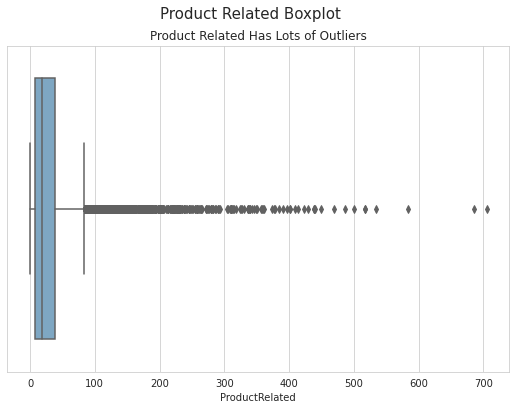

In [ ]:
#outlier analysis of Product Related
plt.figure(figsize=(9,6))
sns.set_style("whitegrid")
sns.boxplot(x= 'ProductRelated', data=df, palette= 'PuBu')

title_string = "Product Related Boxplot"
subtitle_string = "Product Related Has Lots of Outliers"

plt.suptitle(title_string, y = 0.97, fontsize = 15)
plt.title(subtitle_string, fontsize = 12)
plt.show()


In [ ]:
#Divide ProductRelated values into several ranges to find out the distribution
ProductRelated1 = df.ProductRelated[(df.ProductRelated >= 0) & (df.ProductRelated <= 7)]
ProductRelated2 = df.ProductRelated[(df.ProductRelated >= 8) & (df.ProductRelated <= 15)]
ProductRelated3 = df.ProductRelated[(df.ProductRelated >= 16) & (df.ProductRelated <= 23)]
ProductRelated4 = df.ProductRelated[(df.ProductRelated >= 24) & (df.ProductRelated <= 31)]
ProductRelated5 = df.ProductRelated[(df.ProductRelated >= 32) & (df.ProductRelated <= 39)]

prox = ["0-7","8-15","16-23","24-31","32-39"]
proy = [len(ProductRelated1.values),
        len(ProductRelated2.values),
        len(ProductRelated3.values),
        len(ProductRelated4.values),
        len(ProductRelated5.values)]

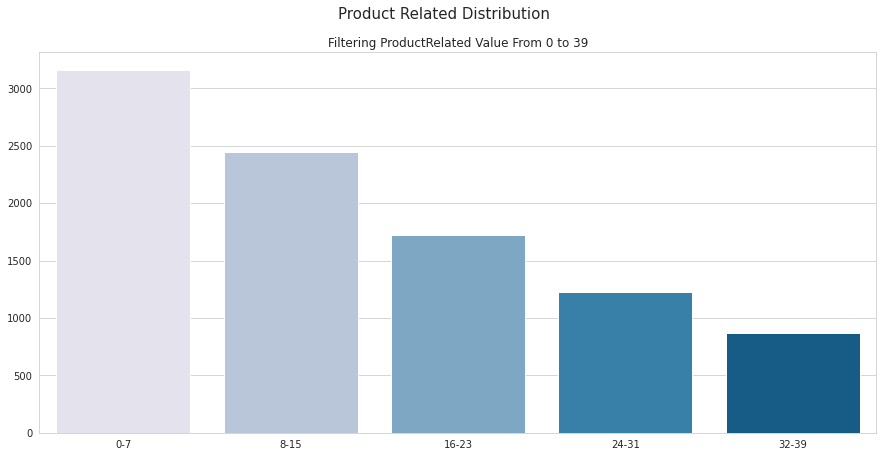

In [ ]:
#ProductRelated distribution in barplot 
plt.figure(figsize=(15,7))
sns.set_style("whitegrid")
sns.barplot(x=prox, y=proy, palette= 'PuBu')

title_string = "Product Related Distribution"
subtitle_string = "Filtering ProductRelated Value From 0 to 39"

plt.suptitle(title_string, y = 0.97, fontsize = 15)
plt.title(subtitle_string, fontsize = 12)
plt.show()

Most consumers have low `ProductRelated` value, **but** does it related with `Revenue` ?

In [ ]:
#Filter dataset to include ProductRelated which have 0-39 value only
df_ProductRelated = df[(df["ProductRelated"] >= 0) & (df['ProductRelated'] <= 39)]

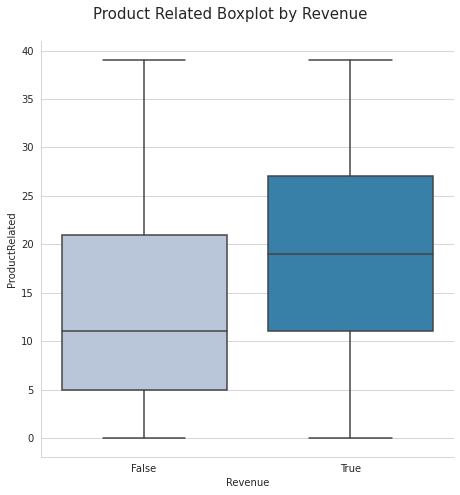

In [ ]:
#Comparing ProductRelated value by Revenue

sns.set_style("whitegrid")
sns.catplot(data=df_ProductRelated, y='ProductRelated',x='Revenue',kind='box',palette= 'PuBu',height=6.5)

title_string = "Product Related Boxplot by Revenue"

plt.suptitle(title_string, y = 1.05, fontsize = 15)
plt.show()


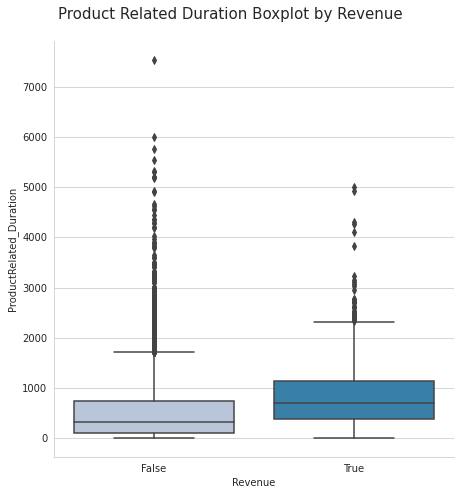

In [ ]:
#Comparing ProductRelated Duration value by Revenue
sns.set_style("whitegrid")
sns.catplot(data=df_ProductRelated, y='ProductRelated_Duration',x='Revenue',kind='box',palette= 'PuBu',height=6.5)

title_string = "Product Related Duration Boxplot by Revenue"

plt.suptitle(title_string, y = 1.05, fontsize = 15)
plt.show()


`ProductRelated` isn't an ideal predictor because false and true values for `Revenue` have almost same characteristics. 

↪ This finding refutes the previous statement which said that "..the higher the value of related products, the higher the number of consumers who completed transactions."

# Page Values

Based on the descriptive analysis, `PageValues` has lots of outliers. It need to be analyze to get better understanding of the data.

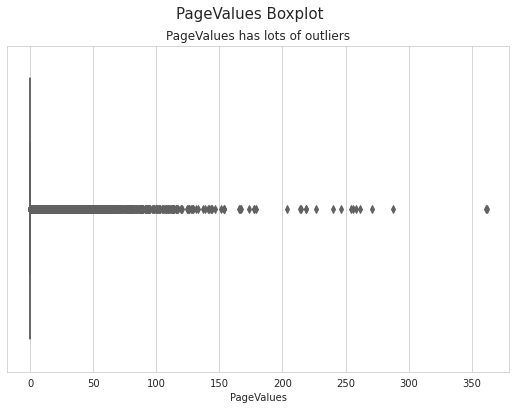

In [ ]:
#outlier analysis of PageValues
plt.figure(figsize=(9,6))
sns.set_style("whitegrid")
sns.boxplot(x= 'PageValues', data=df, palette= 'PuBu')

title_string = "PageValues Boxplot"
subtitle_string = "PageValues has lots of outliers"

plt.suptitle(title_string, y = 0.97, fontsize = 15)
plt.title(subtitle_string, fontsize = 12)
plt.show()

Considering wide range of numbers in `PageValues`, analysis will start by comparing total of consumer with zero `PageValues` and non-zero `PageValues`

In [ ]:
#filter data with non-zero PageValues
df_PageValues = df[df["PageValues"] != 0]
df_PageValues['Revenue'].value_counts()

True     1538
False    1192
Name: Revenue, dtype: int64

In [ ]:
#filter data with zero PageValues
df_PageValues2 = df[df["PageValues"] == 0]
df_PageValues2['Revenue'].value_counts()

False    9230
True      370
Name: Revenue, dtype: int64

<Figure size 1080x504 with 0 Axes>

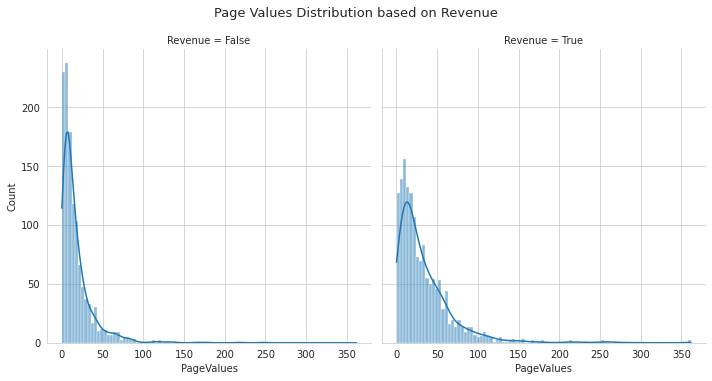

In [ ]:
#Distribution of Revenue based on PageValues
plt.figure(figsize=(15,7))
sns.set_style("whitegrid")
sns.displot(x="PageValues", data=df_PageValues, col='Revenue', kde=True,palette= 'PuBu')

title_string = "Page Values and Revenue"

plt.suptitle(title_string, y = 1.05, fontsize = 13)
plt.show()

Based on the above analysis, it can be seen if consumers will complete the purchase if `PageValues` has greater than zero value. More exact numbers are difficult to come by because false and true `Revenue` have almost same distribution.

# Exit Rates and Bounce Rates

`BounceRates` and `ExitRates` almost have the same goal which is to measure the tendency of consumers to leave before completing a transaction. So, the smaller the value, the better. This pattern seen in the violin plot below. This results makes both variables as good predictors of Revenue.

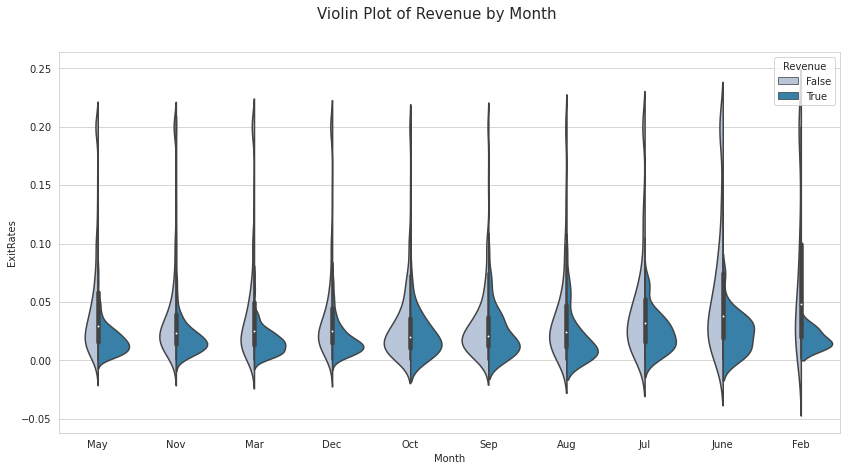

In [ ]:
#distribution of ExitRates and Revenue
plt.figure(figsize=(14,7))
sns.set_style("whitegrid")
sns.violinplot(x=df.Month , y = df.ExitRates , hue= df.Revenue,split=True,palette= 'PuBu',order = df['Month'].value_counts().index)

title_string = "Violin Plot of ExitRates, Revenue, and Month"

plt.suptitle(title_string, y = 0.97, fontsize = 15)
plt.show()

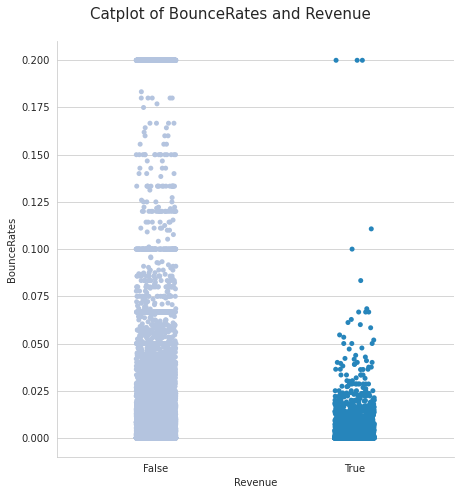

In [ ]:
#distribution of BounceRates and Revenue

sns.set_style("whitegrid")
sns.catplot(y="BounceRates", data=df, x='Revenue', palette= 'PuBu',height=6.5)

title_string = "Catplot of BounceRates and Revenue"

plt.suptitle(title_string, y = 1.05, fontsize = 15)
plt.show()

# Summary

Intention is motive to make a purchase. Several interventions are needed to make it drive behavior of purchasing. After conducting an EDA analysis, several insights were found on things that affect purchase intention. 

One of the predictor is **time**. In this case, consumers mostly make purchases in November, when certain special days are approaching, and on weekdays. Another influencing factor is the **duration and number of pages** visited by consumers. They are more likely to buy when they visit the `Administrative` and `ProductRelated` pages. This pattern is also found in one of the google analytics metrics, `PageValues`. Meanwhile, in `BounceRates` and `ExitRates`, consumers will buy if both of them have low scores.